# Convolutional Neural Networks
Use of the MNIST dataset to practice CNN

In [95]:
from keras.datasets import mnist
import livelossplot
import matplotlib.pyplot as plt
%matplotlib inline




Load MNIST dataset

In [96]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

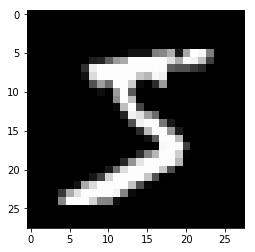

In [97]:
plt.imshow(X_train[0], cmap='gray')

Prepare Data for CNN

In [98]:
X_train = X_train.reshape(60000, 28, 28, 1)/255
X_test = X_test.reshape(10000, 28, 28, 1)/255

Initialize the Network

In [99]:
from keras.models import Sequential
model_S = Sequential()

Add first convolutional layer

In [100]:
from keras.layers import Conv2D
model_S.add(Conv2D(28, (3,3), input_shape = (28, 28, 1), activation= 'relu'))

Add Pooling Layer

In [101]:
from keras.layers import MaxPooling2D
model_S.add(MaxPooling2D(pool_size = (2,2)))

Add Flattening Layer

In [102]:
from keras.layers import Flatten
model_S.add(Flatten())

Add Fully Connected Layer

In [103]:
from keras.layers import Dense
model_S.add(Dense(units=128, activation ='relu'))

Add Output layer

In [104]:
model_S.add(Dense(units=10, activation ='softmax'))

Build the CNN

In [105]:
model_S.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'] )

Train the CNN

In [106]:
plot_losses = livelossplot.PlotLossesKeras()

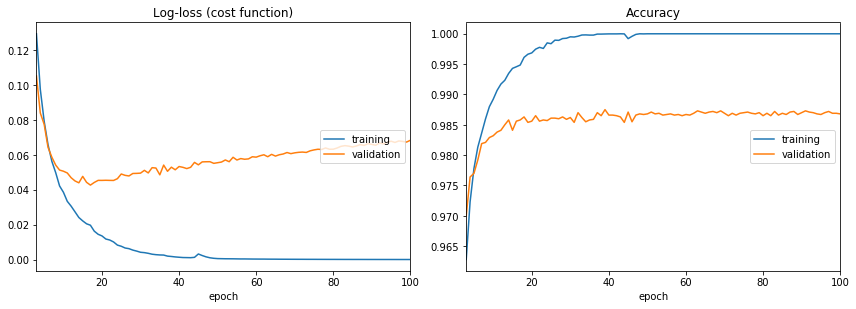

Log-loss (cost function):
training   (min:    0.000, max:    0.542, cur:    0.000)
validation (min:    0.043, max:    0.234, cur:    0.068)

Accuracy:
training   (min:    0.859, max:    1.000, cur:    1.000)
validation (min:    0.931, max:    0.988, cur:    0.987)


In [107]:
model_S.fit(X_train, y_train, callbacks = [plot_losses], epochs = 100, validation_data = (X_test, y_test), batch_size= 1000)

Test the CNN

In [108]:
loss, accuracy = model_S.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 147us/step


In [109]:
print (loss)

0.06833525291582701


In [110]:
print(accuracy)

0.9868
